# De beaux graphiques avec python: mise en pratique

<p class="badges">

<a href="https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/visualisation/matplotlib.ipynb" class="github"><i class="fab fa-github"></i></a>
<a href="https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/visualisation/matplotlib.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter" alt="Download"></a>
<a href="https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/notebooks/course/visualisation/matplotlib.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter" alt="nbviewer"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2%BB&init.personalInitArgs=%C2%ABvisualisation%20matplotlib%C2%BB&security.allowlist.enabled=false" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&amp;color=yellow?logo=Python" alt="Onyxia"></a><br>
<a href="https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath={binder_path}" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=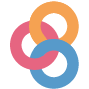" alt="Binder"></a>
<a href="http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master/notebooks/course/visualisation/matplotlib.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
<a href="https://github.dev/linogaliana/python-datascientist/notebooks/course/visualisation/matplotlib.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=visualstudiocode&label=&message=Open%20in%20Visual%20Studio%20Code&labelColor=2c2c32&color=007acc&logoColor=007acc" alt="githubdev"></a>

</p>

</p>

La pratique de la visualisation se fera, dans ce cours, en répliquant des graphiques qu’on peut trouver sur
la page de l’*open-data* de la ville de Paris
[ici](https://opendata.paris.fr/explore/dataset/comptage-velo-donnees-compteurs/information/?disjunctive.id_compteur&disjunctive.nom_compteur&disjunctive.id&disjunctive.name).

Ce TP vise à initier:

-   Aux packages [matplotlib](https://matplotlib.org/) et
    [seaborn](https://seaborn.pydata.org/) pour la construction de graphiques figés
-   Au package [plotly](https://plotly.com/python/) pour les graphiques
    dynamiques, au format HTML

Nous verrons par la suite la manière de construire des cartes facilement avec
des formats équivalents.

Un sous-ensemble des données de [paris open data](https://opendata.paris.fr/explore/dataset/comptage-velo-donnees-compteurs/information/?disjunctive.id_compteur&disjunctive.nom_compteur&disjunctive.id&disjunctive.name) a été mis à disposition
sur pour faciliter l’import (élimination des colonnes
qui ne nous serviront pas mais ralentissent l’import).

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Etre capable de construire des visualisations de données
intéressantes est une compétence nécessaire à tout
*data-scientist*. Pour améliorer
la qualité de ces visualisations, il est recommandé
de suivre certains conseils donnés par des spécialistes
de la *dataviz* sur la sémiologie graphique.
Les bonnes visualisations de données, comme celles du *New York Times*,
reposent certes sur des outils adaptés (des librairies `JavaScript`)
mais aussi sur certaines règles de représentation qui permettent
de comprendre en quelques secondes le message d’une visualisation.
Ce [post de blog](https://blog.datawrapper.de/text-in-data-visualizations/?utm_source=substack&utm_medium=email)
est une ressource qu’il est utile de consulter régulièrement.

## Premier graphique avec l’API `matplotlib` de `pandas`

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">

**Exercice 1 : Importer les données et produire un premier graphique**

1.  Importer les données de compteurs de vélos. Vous pouvez utiliser l’url <https://github.com/linogaliana/python-datascientist/raw/master/data/bike.csv>. :warning: Il s’agit de données
    compressées au format `gzip`, il faut donc utiliser l’option `compression = 'gzip'`

2.  En premier lieu, sans se préoccuper des éléments de style ni des labels des
    graphiques, reproduire les deux premiers graphiques de la
    [page d’analyse des données](https://opendata.paris.fr/explore/dataset/comptage-velo-donnees-compteurs/dataviz/?disjunctive.id_compteur&disjunctive.nom_compteur&disjunctive.id&disjunctive.name):
    *Les 10 compteurs avec la moyenne horaire la plus élevée* et *Les 10 compteurs ayant comptabilisés le plus de vélos*. Les valeurs chiffrées des graphiques seront différentes de celles de la page en ligne, c’est normal, nous travaillons sur des données plus anciennes.

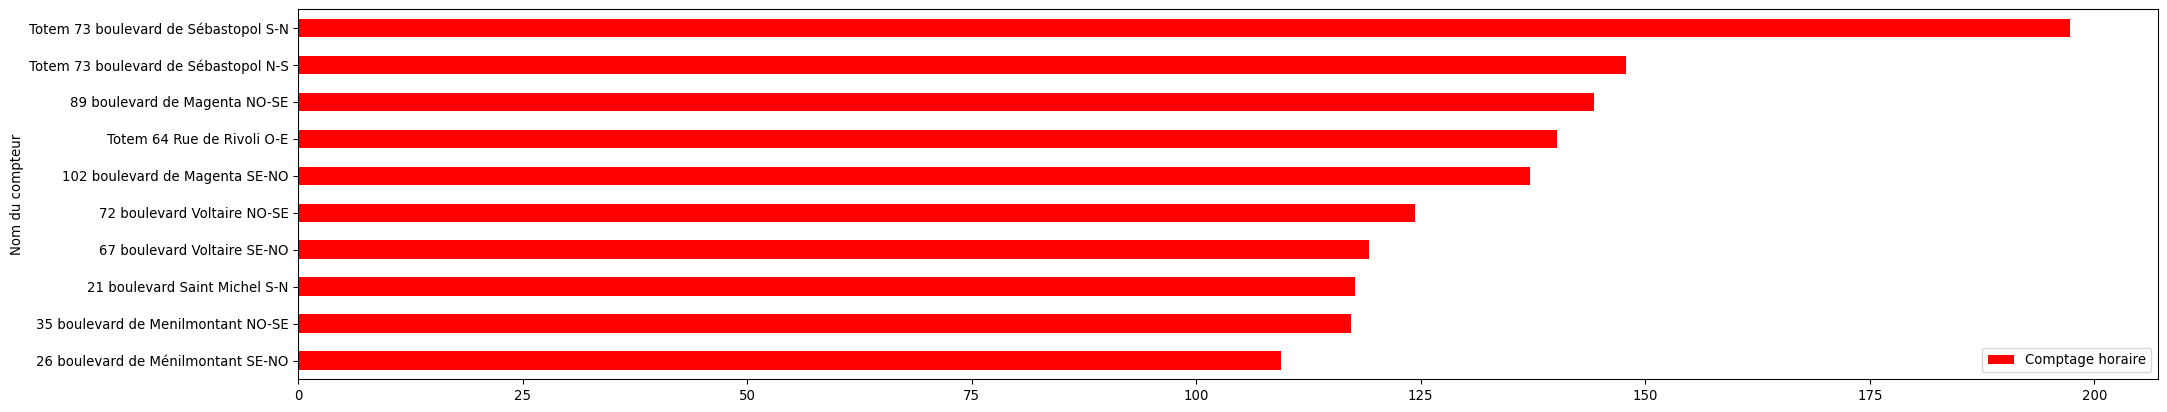

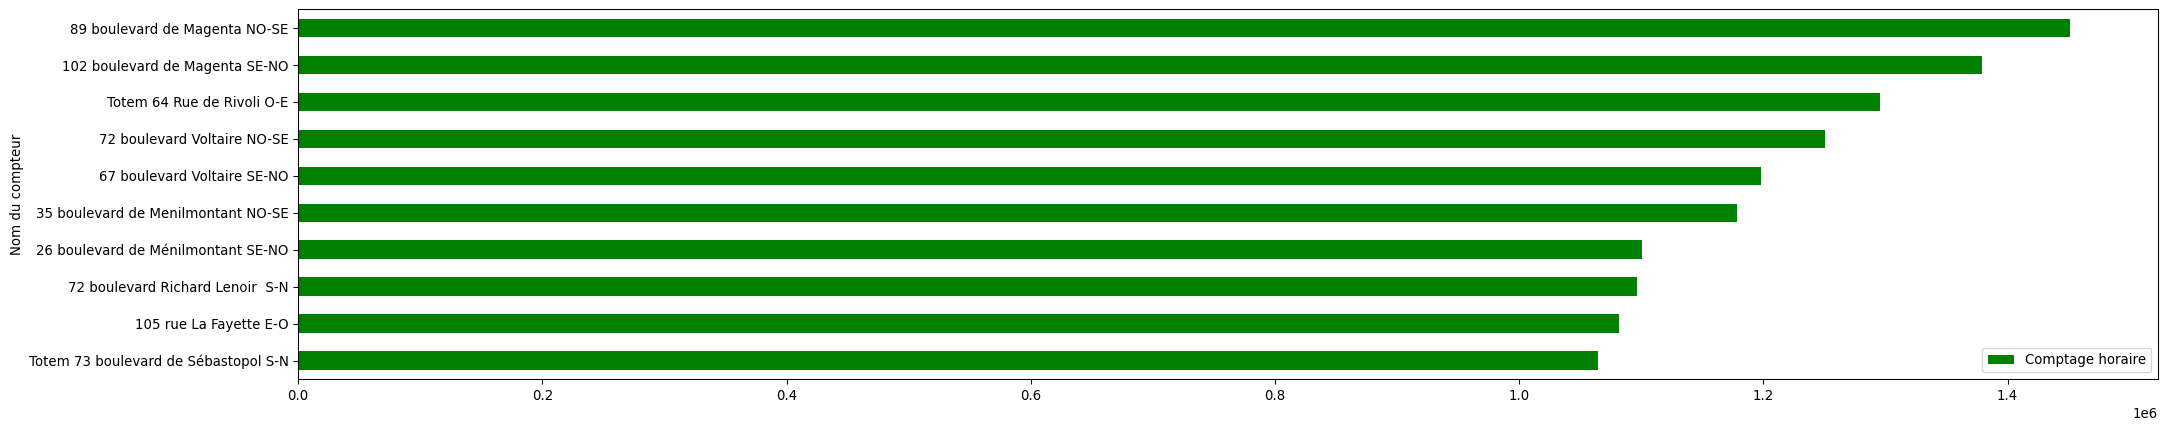

</div>

<div class="alert alert-info" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #007bff80;">

Pour obtenir un graphique ordonné du plus grand au plus petit, il faut avoir les données ordonnées du plus petit au
plus grand. C’est bizarre mais c’est comme ça…

</div>

On peut remarquer plusieurs éléments problématiques (par exemple les labels) mais
aussi des éléments ne correspondant pas (les titres des axes, etc.) ou
manquants (le nom du graphique…)

Comme les graphiques produits par `pandas` suivent la logique très flexible
de `matplotlib`, il est possible de les customiser. Cependant, c’est
souvent beaucoup de travail et il peut être préférable de directement
utiliser *seaborn*, qui offre quelques arguments prêts à l’emploi.

## Utiliser directement `seaborn`

Vous pouvez repartir des deux dataframes précédents. On va suppose qu’ils se
nomment `df1` et `df2`.

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">

**Exercice 2 : Un peu de style !**

Il y a plusieurs manières de faire un *bar* plot en `seaborn`. La plus flexible,
c’est-à-dire celle qui permet le mieux d’interagir avec `matplotlib` est
`catplot`

1.  Réinitialiser l’index des df pour avoir une colonne *‘Nom du compteur’*

2.  Refaire le graphique précédent avec la fonction `catplot` de `seaborn`. Pour
    contrôler la taille du graphique vous pouvez utiliser les arguments `height` et
    `aspect`.

3.  Ajouter les titres des axes et le titre du graphique pour le premier graphique

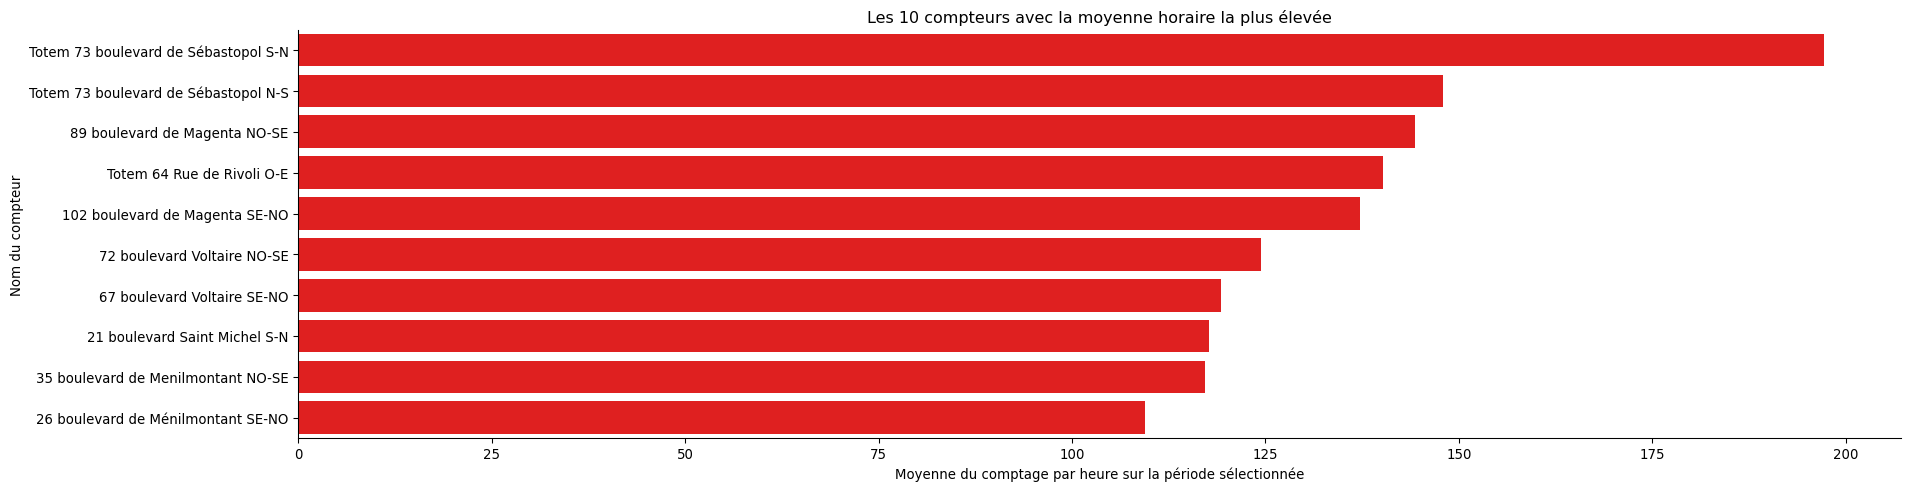

1.  Refaites l’exercice avec la fonction `sns.barplot`.

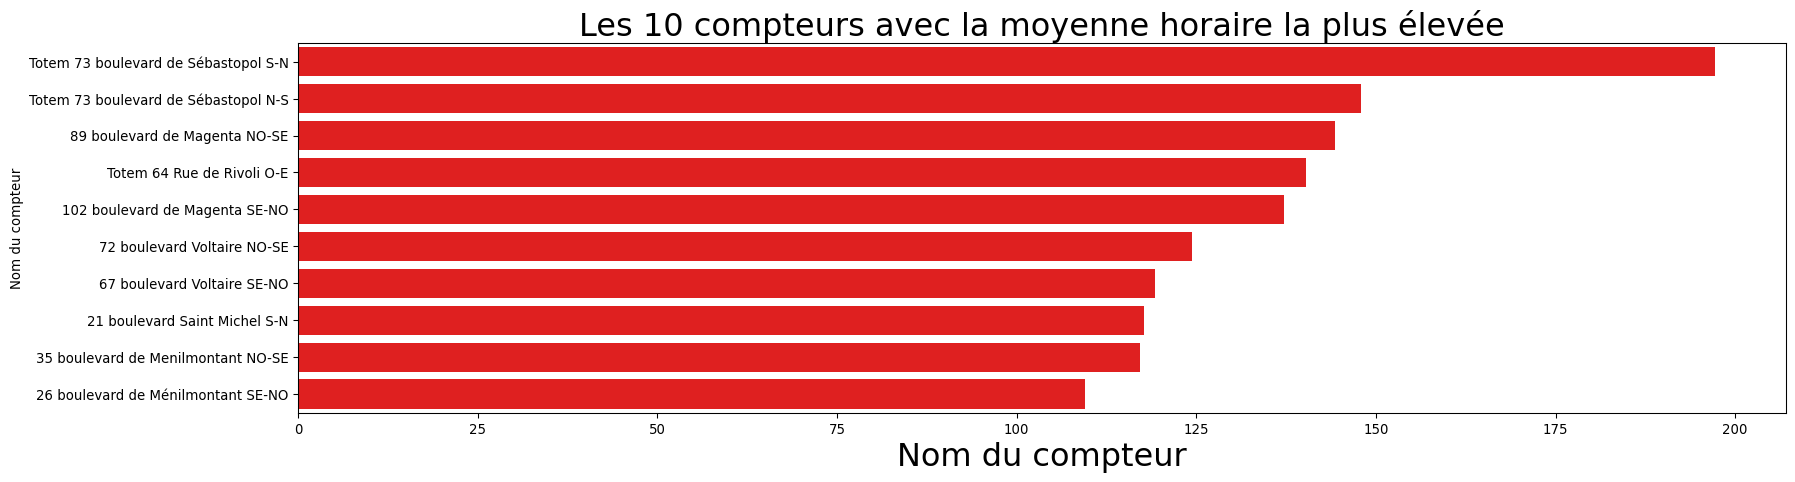

``` python
g.figure.get_figure().savefig('featured.png')
```

1.  Essayez de colorer en rouge l’axe des `x`. Vous pouvez pré-définir un
    style avec `sns.set_style("ticks", {"xtick.color": "red"})`

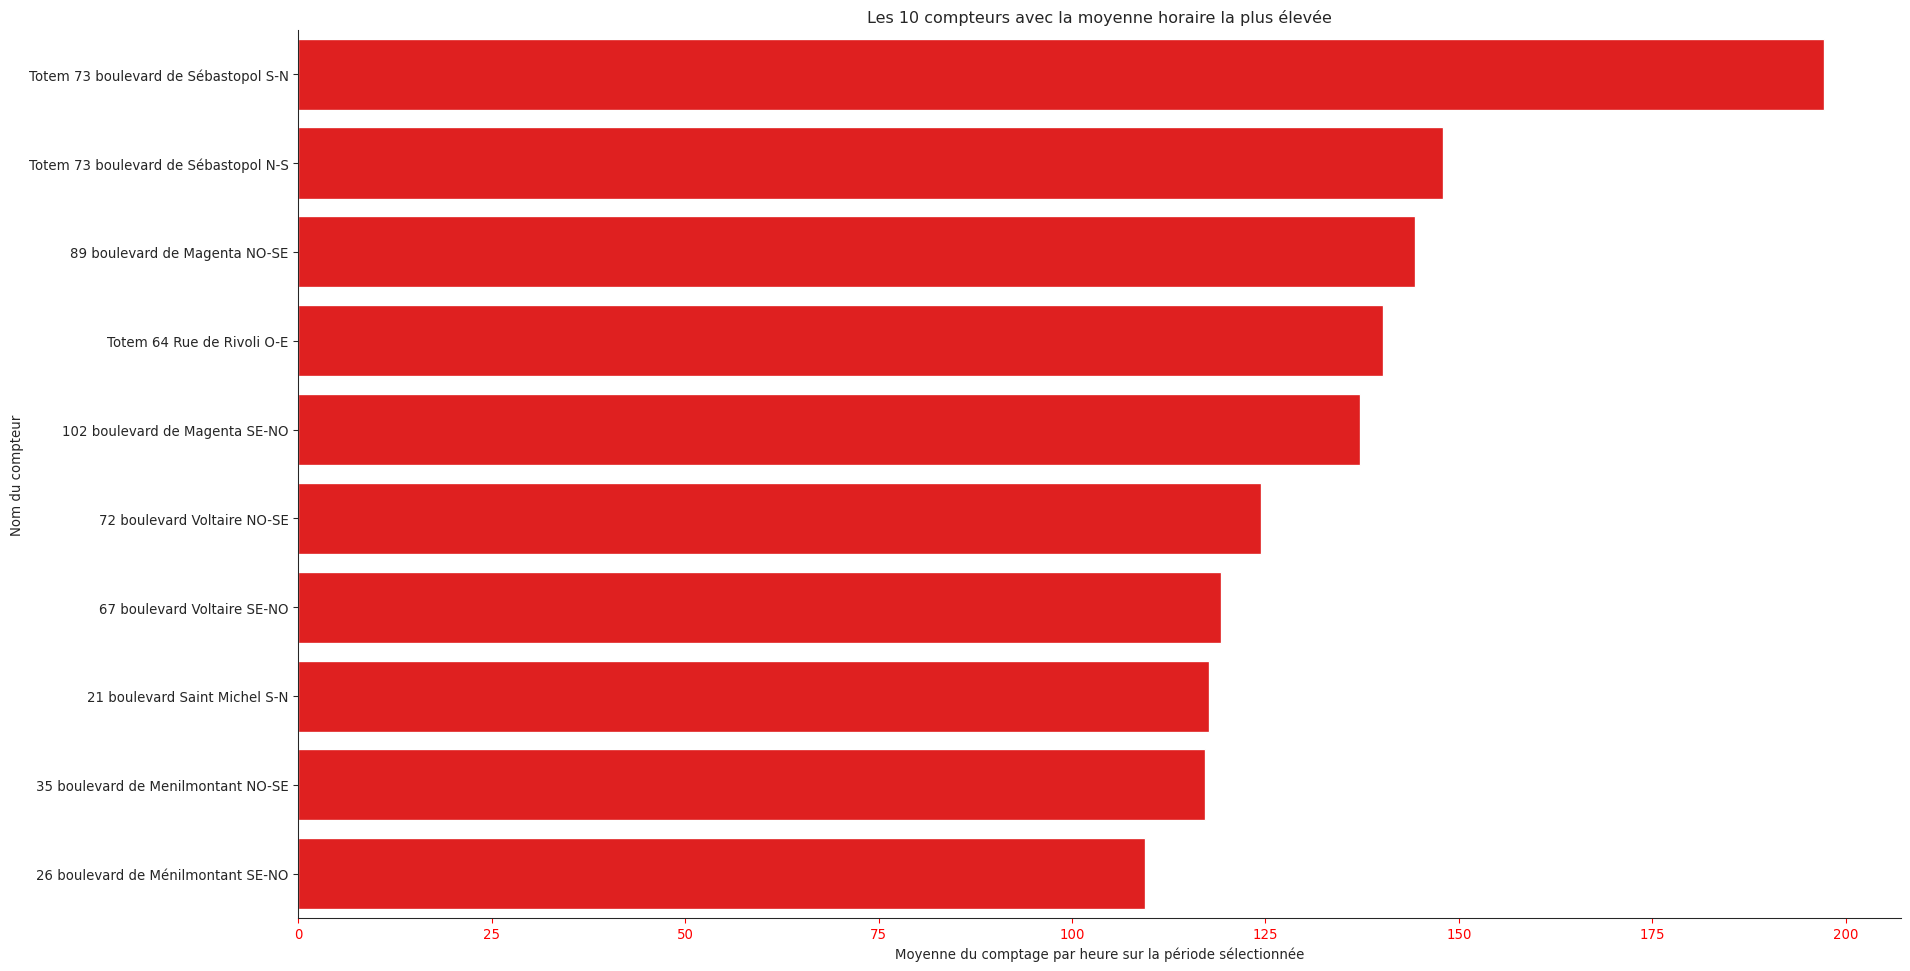

</div>

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">

**Exercice 3 : Refaire les graphiques**

1.  Refaire le graphique *Les 10 compteurs ayant comptabilisé le plus de vélos*

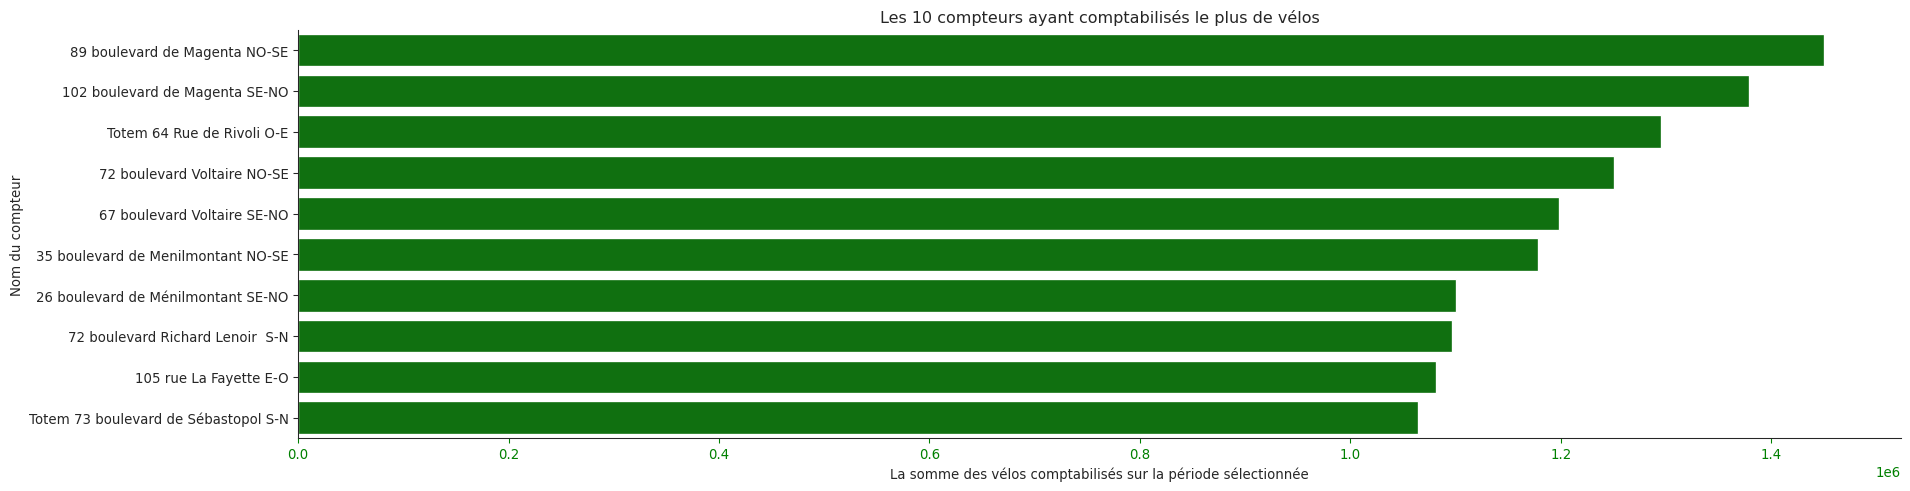

1.  Les graphiques qui suivent vont nécessiter un peu d’agilité dans la gestion des dates. Il faut en effet commencer par créer une variable temporelle (vous pouvez la nommer
    `timestamp`) et la transformer en variable mensuelle (grâce à
    `dt.to_period('M')`) et l’appeler `month`. Vous pouvez essayer de le faire vous même ou cliquer
    ci-dessous pour la solution.

<details>

<summary>

Solution

</summary>

``` python
df['timestamp'] = pd.to_datetime(df['Date et heure de comptage'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
df['month'] = df['timestamp'].dt.to_period('M')
```

</details>

1.  Refaire le graphique *Moyenne mensuelle des comptages vélos*.

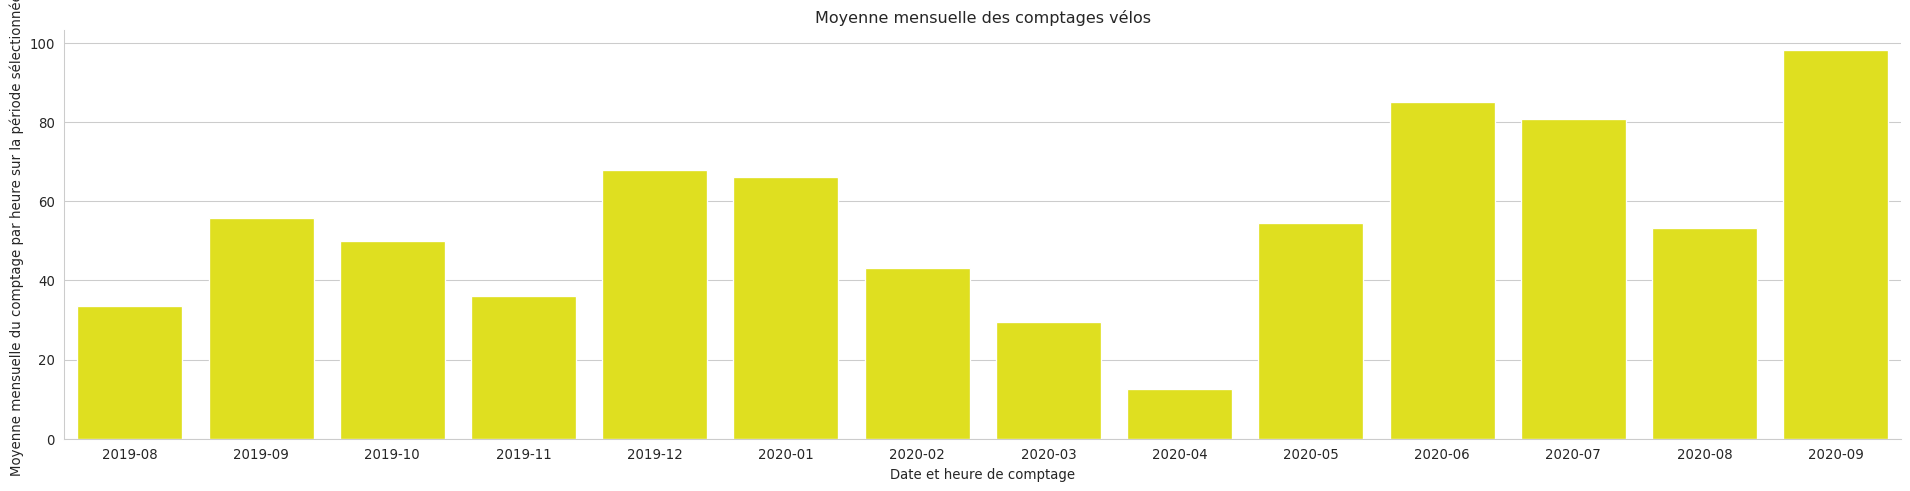

1.  Refaire le graphique *Moyenne journalière des comptages vélos* (créer d’abord une variable de jour avec `.dt.day`)

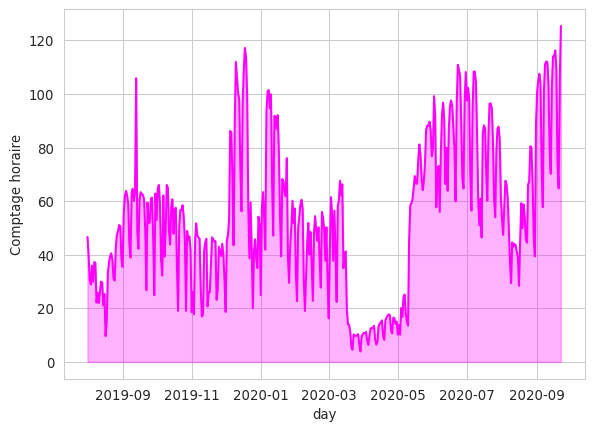

1.  Refaire le graphique *Comptages vélo au cours des 7 derniers jours* (de l’échantillon)

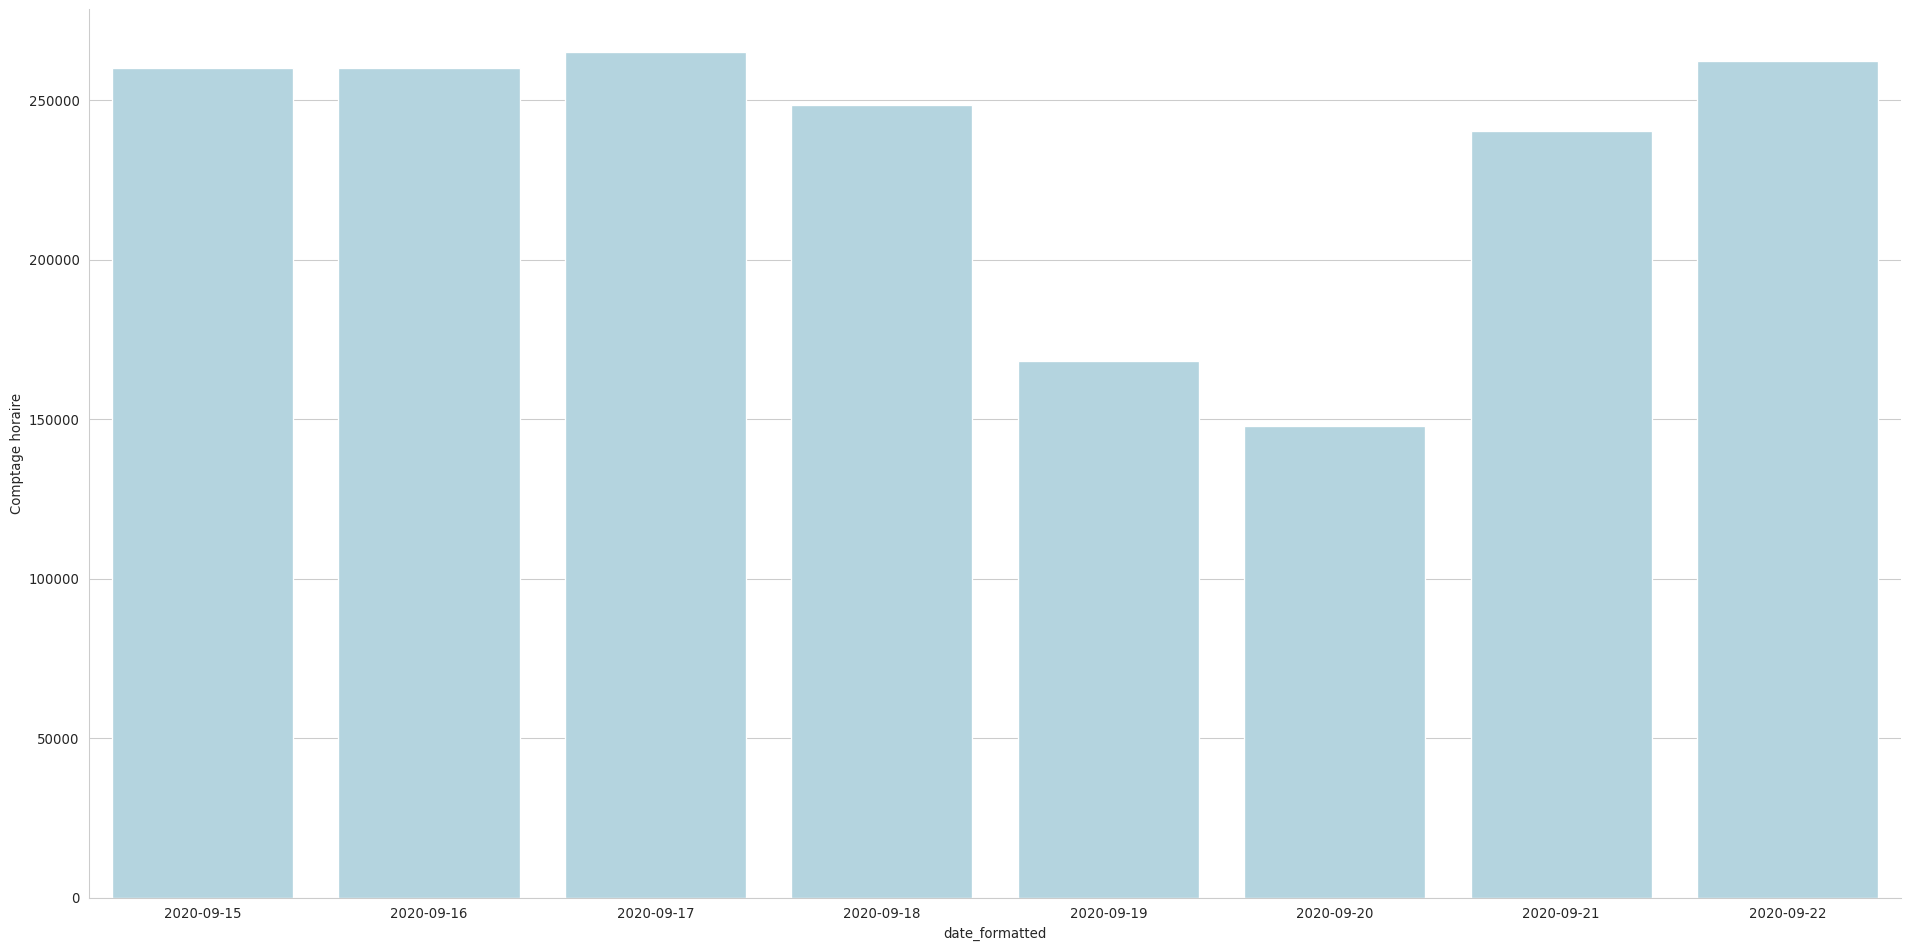

</div>

## Des graphiques dynamiques avec `Plotly`

Le package `Plotly` est une surcouche à la librairie Javascript
`Plotly.js` qui permet de créer et manipuler des objets graphiques de manière
très flexible afin de produire des objets réactifs sans avoir à recourir
à Javascript.

Le point d’entrée recommandé est le module `plotly.express`
([documentation ici](https://plotly.com/python/plotly-express/)) qui offre une arborescence
riche mais néanmoins intuitive pour construire des graphiques
(objets `plotly.graph_objects.Figure`) pouvant être modifiés *a posteriori*
si besoin (par exemple pour *customiser* les axes).

### Comment visualiser un graphique `plotly` ?

Dans un notebook Jupyter classique, les lignes suivantes de code permettent
d’afficher le résultat d’une commande `Plotly` sous un bloc de code:

``` python
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
```

Pour `JupyterLab`, l’extension `jupyterlab-plotly` s’avère nécessaire:

``` python
jupyter labextension install jupyterlab-plotly
```

Pour les utilisateurs de `python` via l’excellent package `R` `reticulate`, il
est possible d’écrire le résultats dans un fichier `.html` et d’utiliser
`htmltools::includeHTML` pour l’afficher via `R Markdown` (les utilisateurs
de `R` trouveront bien-sûr une technique bien plus simple: utiliser
directement le package `R` `plotly`…)

### Réplication de l’exemple précédent avec `plotly`

Les modules suivants seront nécessaires pour construire des graphiques
avec `plotly`:

In [25]:
import plotly
import plotly.express as px
from IPython.display import HTML #pour afficher les graphs
# dans une cellule de notebook

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">

**Exercice 4 : Premier graphique avec plotly**

L’objectif est de reconstuire le premier diagramme en barre rouge avec `plotly`.

1.  Réalisez le graphique en utilisant la fonction adéquate avec `plotly.express` et…

-   Ne pas prendre le
    thème par défaut mais un à fond blanc, pour avoir un résultat ressemblant
    à celui proposé sur le site de l’*open-data*.
-   Pour la couleur rouge,
    vous pouvez utiliser l’argument `color_discrete_sequence`.
-   Ne pas oublier de nommer les axes
-   Pensez à la couleur du texte de l’axe inférieur

1.  Tester un autre thème, à fond sombre. Pour les couleurs, faire un
    groupe stockant les trois plus fortes valeurs puis les autres.

</div>

La première question permet de construire le graphique suivant:

Alors qu’avec le thème sombre (question 2), on obtient :

# Exercices supplémentaires

Pour ces exercices, il est recommandé de s’inspirer
des modèles présents dans la librairie
de graphiques `Python` présentée
dans https://www.python-graph-gallery.com/

## Les lollipop chart

Cet exercice permet de s’entraîner
sur le fichier des naissances et des
décès de l’Insee. Il s’inspire d’une
excellente visualisation faite
par [Jean Dupin](https://www.jdupin.com/)
sur `Twitter` mettant en avant l’évolution,
année par année, des décomptes des
personnes nommées *“Jean”* parmi les
personnes nées ou décédées:

L’animation de Jean Dupin
est beaucoup plus raffinée que
celle que nous allons mettre en
oeuvre.

### Récupération des données

La récupération des données étant un peu complexe,
le code est donné pour vous permettre de vous
concentrer sur l’essentiel (si vous
voulez vous exercer avec le package `requests`,
essayez de le faire vous-même).

Les données des décès sont disponibles de manière
historique dans des zip pour chaque année.

In [28]:
import shutil
import requests
import zipfile
import os
import glob
import pandas as pd

def import_by_decade(decennie = 1970):

    url = f"https://www.insee.fr/fr/statistiques/fichier/4769950/deces-{decennie}-{decennie+9}-csv.zip"

    req = requests.get(url)

    with open(f"deces_{decennie}.zip",'wb') as f:
        f.write(req.content)

    with zipfile.ZipFile(f"deces_{decennie}.zip", 'r') as zip_ref:
        zip_ref.extractall(f"deces_{decennie}")

    csv_files = glob.glob(os.path.join(f"deces_{decennie}", "*.csv"))

    df = [pd.read_csv(f, sep = ";", encoding="utf-8").assign(annee = f) for f in csv_files]
    df = pd.concat(df)
    df[['nom','prenom']] = df['nomprenom'].str.split("*", expand=True)
    df['prenom'] = df['prenom'].str.replace("/","")
    df['annee'] = df['annee'].str.rsplit("/").str[-1].str.replace("(Deces_|.csv|deces-)","").astype(int)

    shutil.rmtree(f"deces_{decennie}")    
    os.remove(f"deces_{decennie}.zip")

    return df


dfs = [import_by_decade(d) for d in [1970, 1980, 1990, 2000, 2010]]
deces = pd.concat(dfs)

Le fichier des naissances est plus simple à récupérer.
Voici le code pour l’obtenir:

In [29]:
year = 2021
url_naissance = f"https://www.insee.fr/fr/statistiques/fichier/2540004/nat{year}_csv.zip"

req = requests.get(url_naissance)

with open(f"naissance_{year}.zip",'wb') as f:
    f.write(req.content)

with zipfile.ZipFile(f"naissance_{year}.zip", 'r') as zip_ref:
    zip_ref.extractall(f"naissance_{year}")

naissance = pd.read_csv(f"naissance_{year}/nat{year}.csv", sep = ";")
naissance = naissance.dropna(subset = ['preusuel'] )

On peut enfin restructurer les `DataFrames` pour obtenir un
seul jeu de données, en se restreignant aux *“JEAN”*:

In [30]:
jean_naiss = naissance.loc[naissance['preusuel'] == "JEAN"].loc[:, ['annais', 'nombre']]
jean_naiss = jean_naiss.rename({"annais": "annee"}, axis = "columns")
jean_naiss = jean_naiss.groupby('annee').sum().reset_index()
jean_deces = deces.loc[deces["prenom"] == "JEAN"]
jean_deces = jean_deces.groupby('annee').size().reset_index()
jean_deces.columns = ['annee', "nombre"]
jean_naiss.columns = ['annee', "nombre"]
df = pd.concat(
    [
        jean_deces.assign(source = "deces"),
        jean_naiss.assign(source = "naissance")
    ])
df = df.loc[df['annee'] != "XXXX"]
df['annee']=df['annee'].astype(int)
df = df.loc[df['annee'] > 1971]

df.head(3)

## Représentation graphique

Vous pouvez vous aider du modèle présent
dans https://www.python-graph-gallery.com

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">

icon=“fas fa-pencil-alt” %}}

Pour commencer, on va se concentrer sur la
production d’un seul graphique
(décès ou naissance, vous choisissez)

1.  Créer un objet `df_plot` qui se restreint à une
    source
2.  Fixer une année sous le nom `max_year` (par exemple
    votre année de naissance). Elle servira ensuite de paramètre
    à une fonction
3.  Restreindre `df_plot` aux années antérieures à `max_year`
4.  Créer une variable `my_range` fixant la séquence des années
    entre la plus petite année du dataset et `max_year` (inclus)
5.  Créer un array numpy qui vaut `orange` lorsque l’observation
    en question est `max_year` et `skyblue` sinon
6.  Utiliser les fonctions adéquates de `matplotlib` pour créer
    le *lollipop chart*

</div>

A ce stade, vous devriez avoir une version fonctionnelle
qui peut servir de
base à la généralisation.

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">

icon=“fas fa-pencil-alt” %}}

1.  A partir du code précédent, généraliser en utilisant
    une boucle `for` à partir du résultat de
    `enumerate(df.source.value_counts().index.values)` pour
    créer un graphique pour une année donnée de `maxyear`.
    Avant cette boucle, ne pas oublier de créer un objet
    `matplotlib` vide à remplir dans la boucle

``` python
fig, axes = plt.subplots(1, 2, sharey = True)
```

1.  Encapsuler ce code dans une fonction qui
    prend en argument un `DataFrame` et une
    année `max_year`

Voici un exemple d’output pour `max_year = 2010`:

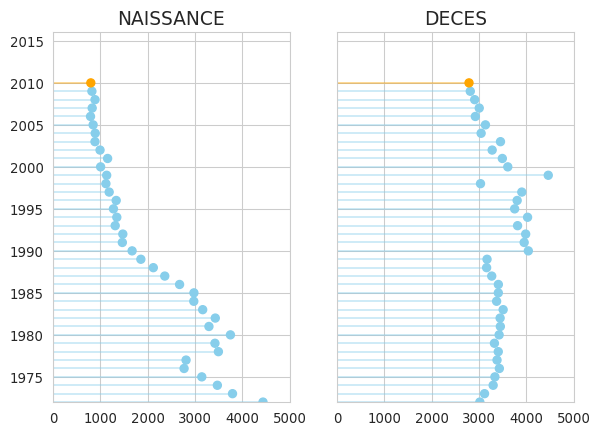

1.  Pour créer une animation, on propose
    d’utiliser la solution présentée
    dans https://www.python-graph-gallery.com/animation/.
    et qui nécessite le logiciel `imagemagick`.
    Sauvegarder chaque itération dans un fichier
    dont le nom a la structure `figure_{year}.png`.

Enfin, pour animer les images, on peut utiliser
la librairie `imageio`:

``` python
import glob
import imageio.v2 as imageio
#os.system("convert -delay 15 figure_*.png animation.gif")

filenames=glob.glob("figure_*.png")
filenames.sort()

with imageio.get_writer('animation.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
```

L’animation obtenue est la suivante:

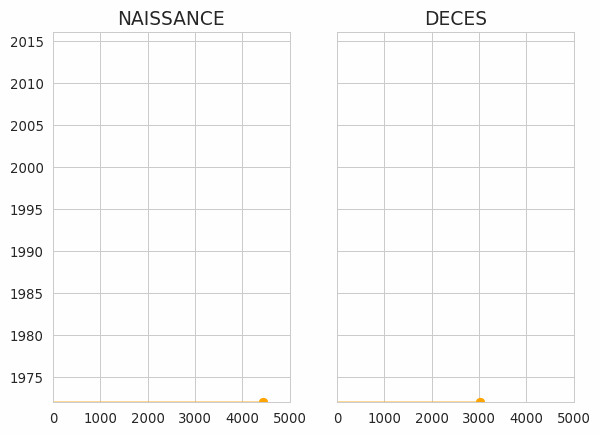

</div>

# Exercices supplémentaires

https://plotly.com/python/v3/3d-network-graph/

# Ressources supplémentaires

-   [Un post de datawrapper sur les textes dans les visualisations de données](https://blog.datawrapper.de/text-in-data-visualizations/?utm_source=substack&utm_medium=email)